<a href="https://colab.research.google.com/github/Zeeshan2012/Yes_Bank_Stock_Price_Project/blob/main/Yes_Bank_Share_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in thenews because of the fraud case involving Rana Kapoor. Owing to this fact, it was interestingto see how that impacted the stock prices of the company and whether Time series modelsor any other predictive models can do justice to such situations. This dataset has monthlystock prices of the bank since its inception and includes closing, starting, highest, and loweststock prices of every month. The main objective is to predict the stock’s closing price of themonth.

Here in this project, our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

Feature Engineering: Introducing New Variables, Dummy Variables

Univariate Analysis: Distplot, Histogram, Barplot

Bivariate Analysis: Boxplot, Heatmap,

Introduced Models: Linear Regression, Lasso and Ridge

Our Data has following features (Column):

1. Open : Opening price of the stock of particular day
2. High : It's the highest price at which a stock traded during a period
3. Low : It's the lowest price at which stock traded during a period
4. Close : Closing price of a stock at the end of a Trading Day
5. Date : We will use it as a index

In [3]:
a = 5
print (a)

5


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YES_Bank_Stock_Price_prediction/data_YesBank_StockPrices.csv') #reading the csv file

In [28]:
#copy the data to df
df = data.copy()

In [29]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [31]:
#get the number of rows and columns in the dataset 
df.shape

(185, 5)

In [32]:
#getting the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There is no null value.
We need to correct date time in correct format


In [42]:
#check for duplicates
len(df[df.duplicated()])

0

In [33]:
#importing datetime
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [34]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [35]:
#desccriptive statistic
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


There is a high variation in values of Open,High,Low and Close

check for distribution of our dataset

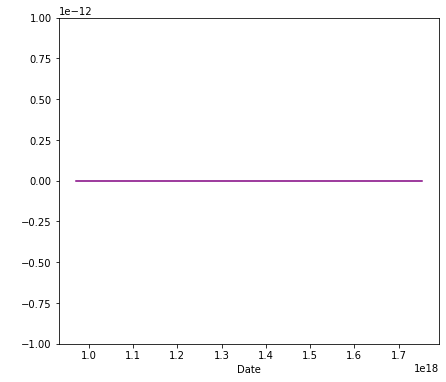

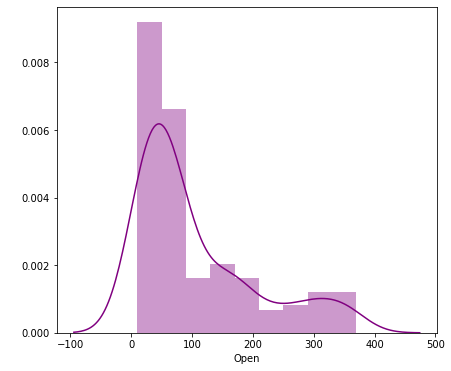

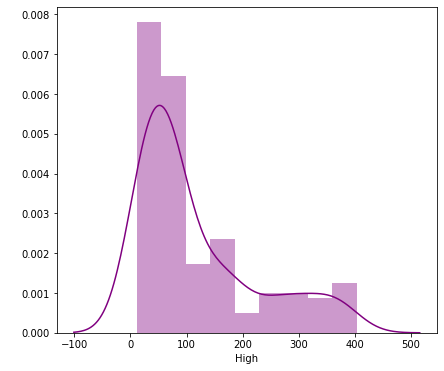

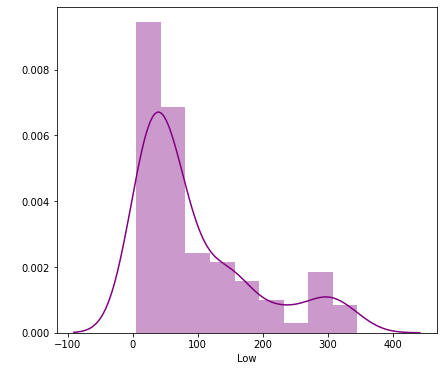

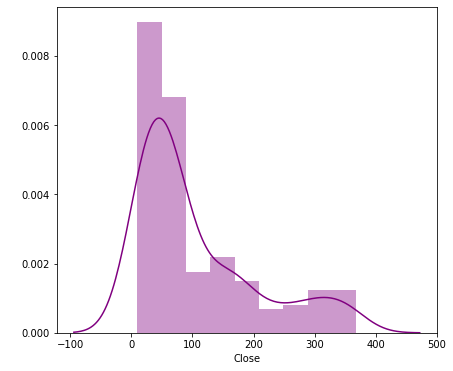

In [59]:
#plot the Distribution graph
#plot for independent variable
for var in df:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var) 


Ignore the Date Graph and
we can see the data is positively screwed so we need to apply log transformation.


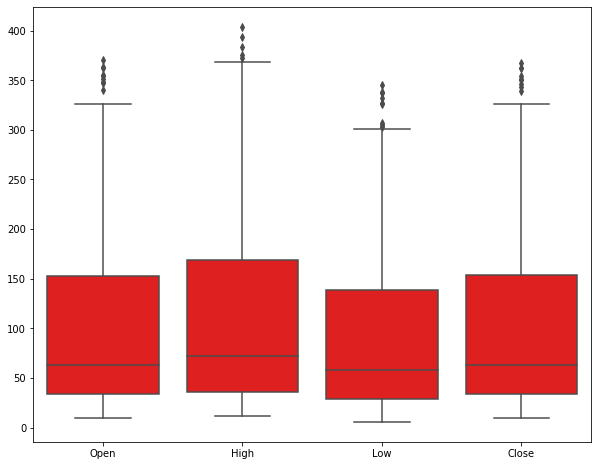

In [65]:
plt.figure(figsize=(10,8))
fig = sns.boxplot(data = df, color = 'red')


In [66]:
#we will store dependent and independent variable separetly
ind_var = df[['Open','High','Low']]
dep_var = df[['Close']]

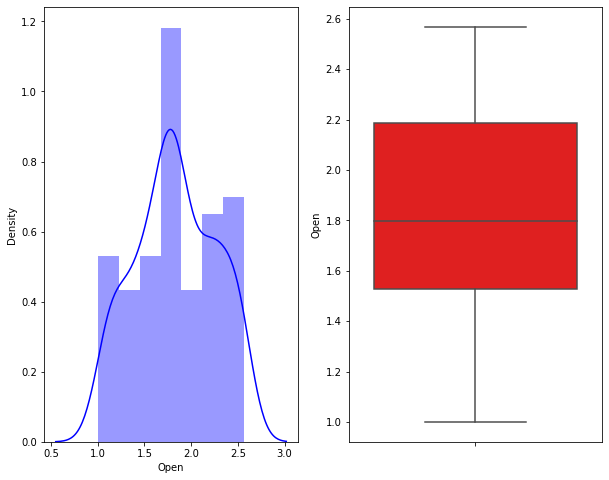

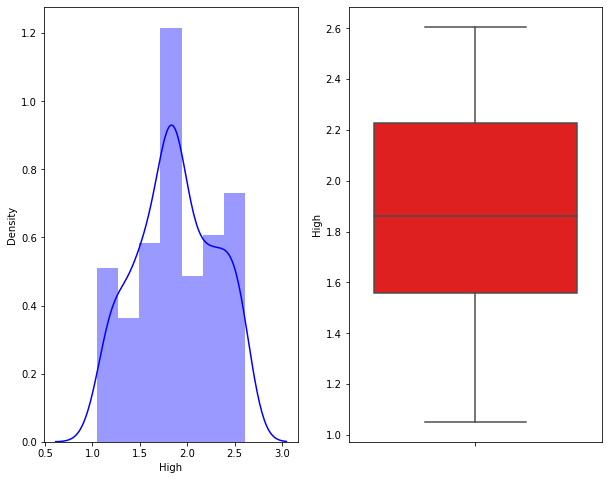

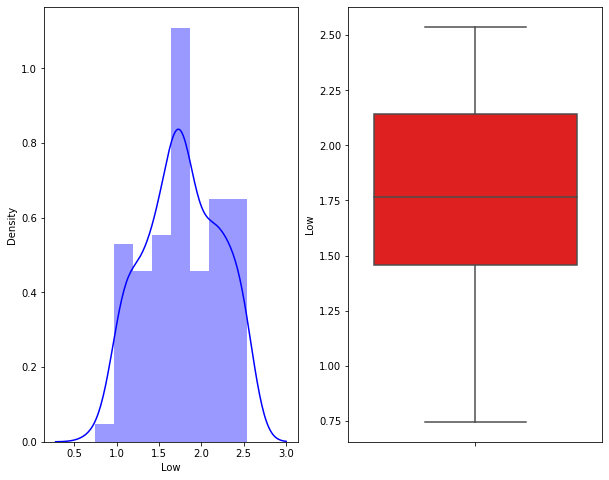

In [74]:
#plot the Graph with Log transformation
for var in ind_var:
  plt.figure(figsize = (10,8))
  plt.subplot(1,2,1)
  fig = sns.distplot(np.log10(ind_var[var]), color = 'blue')
  fig.set_xlabel(var)

  plt.subplot(1,2,2)
  fig = sns.boxplot(y = np.log10(ind_var[var]), color = 'red')